<a href="https://colab.research.google.com/github/Log1cChan/T2F/blob/main/Using_TrainTexttoFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
!pip install bert-serving-client
!pip install -U bert-serving-server[http]

     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 358kB 11.8MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=0fc2a89eada67625270acc76f7d3db63c347d8b31bfe57f082af00006859afbf
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil


In [ ]:
!wget https://storage.googleapis.com/bert_models/2018_11_03/chinese_L-12_H-768_A-12.zip
!unzip chinese_L-12_H-768_A-12.zip

--2021-04-03 15:04:43--  https://storage.googleapis.com/bert_models/2018_11_03/chinese_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381892918 (364M) [application/zip]
Saving to: ‘chinese_L-12_H-768_A-12.zip’

chinese_L-12_H-768_ 100%[===================>] 364.20M   117MB/s    in 3.1s    

2021-04-03 15:04:46 (117 MB/s) - ‘chinese_L-12_H-768_A-12.zip’ saved [381892918/381892918]

Archive:  chinese_L-12_H-768_A-12.zip
   creating: chinese_L-12_H-768_A-12/
  inflating: chinese_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: chinese_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: chinese_L-12_H-768_A-12/vocab.txt  
  inflating: chinese_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: chinese_L-12_H-768_A-12/bert_config.j

In [ ]:
!nohup bert-serving-start -model_dir=chinese_L-12_H-768_A-12 > out.file 2>&1 &

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/T2F")

In [ ]:
ls

aligned_images/  encoder/     latent_representations/  __pycache__/
data/            example.png  model/                   trainResnet.py
dnnlib/          font/        model.py                 trainTextToFace.py


In [ ]:
! python trainTextToFace.py

Using TensorFlow backend.
Dense NO.1
Dense NO.2
Dense NO.3
Reshape over
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
compile over
trainTextToFace.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(sentenceEmbedding, imageDlatents, batch_size = 50, nb_epoch = 200)
2021-04-03 15:10:18.680937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-03 15:10:18.684833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-03 15:10:18.685452: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2021-04-03 15:10:18.685712: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
# !wget -O font/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2021-03-24 03:55:40--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘font/simhei.ttf’

font/simhei.ttf     100%[===================>]   9.58M  6.34MB/s    in 1.5s    

2021-03-24 03:55:42 (6.34 MB/s) - ‘font/simhei.ttf’ saved [10050870/10050870]



In [ ]:
ls

aligned_images/  encoder/     latent_representations/  __pycache__/
data/            example.png  model/                   trainResnet.py
dnnlib/          font/        model.py                 trainTextToFace.py


In [ ]:
import numpy as np
import PIL
from keras.models import load_model
from model import textTodlatentsModel
from bert_serving.client import BertClient
import dnnlib
import pickle
import dnnlib.tflib as tflib
from textwrap import wrap
from encoder.generator_model import Generator
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='font/simhei.ttf')
# plt.rcParams['font.family'] = ['sans-serif']
# plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

Using TensorFlow backend.


In [ ]:
import glob
tflib.init_tf()
Model = 'model/stylegan.pkl'
model_file = glob.glob(Model)
if len(model_file) == 1:
    model_file = open(model_file[0], "rb")
else:
    raise Exception('Failed to find the model')
generator_network, discriminator_network, Gs_network = pickle.load(model_file)
generator = Generator(Gs_network, batch_size=1, randomize_noise=False)











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



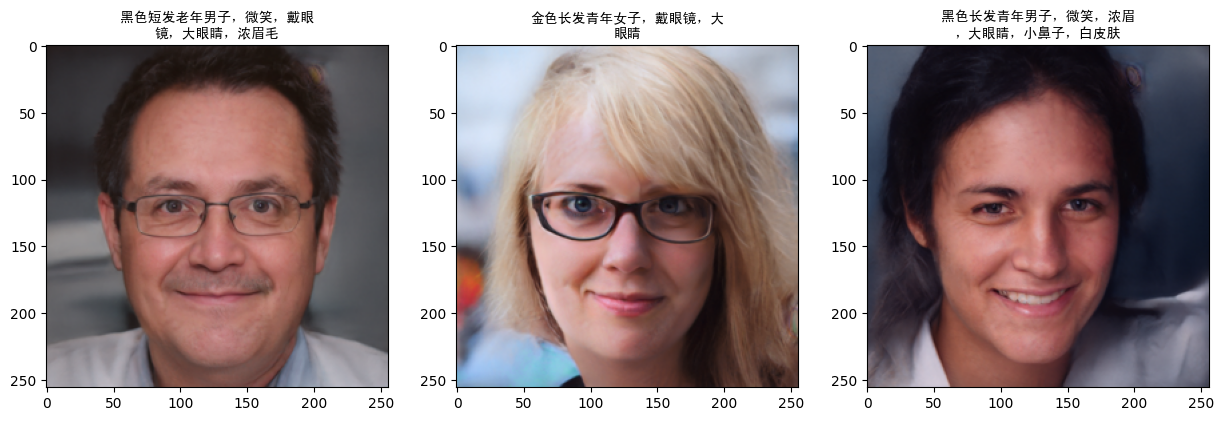

In [ ]:
def predict(inputText):
    sentenceEmbedding = np.zeros(shape = [1, 768], dtype = np.float)
    bc = BertClient()
    sentenceEmbedding = bc.encode([inputText])
    model = load_model("model/textEmbeddingDlatents.h5")
    sentenceEmbedding = np.expand_dims(sentenceEmbedding, 0)
    result = model.predict(sentenceEmbedding)
    return result
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))
text1 = "黑色短发老年男子，微笑，戴眼镜，大眼睛，浓眉毛"
text2 = "金色长发青年女子，戴眼镜，大眼睛"
text3 = "黑色长发青年男子，微笑，浓眉，大眼睛，小鼻子，白皮肤"
result1 = predict(text1)
image1 = generate_image(result1)
result2 = predict(text2)
image2 = generate_image(result2)
result3 = predict(text3)
image3 = generate_image(result3)
plt.figure(figsize=(15,15), dpi=100)
plt.subplot(1, 3, 1)
plt.title("\n".join(wrap(text1, 14)), fontsize=12, fontproperties=zhfont)
plt.imshow(image1)
plt.subplot(1, 3, 2)
plt.title("\n".join(wrap(text2, 14)), fontsize=12, fontproperties=zhfont)
plt.imshow(image2)
plt.subplot(1, 3, 3)
plt.title("\n".join(wrap(text3, 14)), fontsize=12, fontproperties=zhfont)
plt.imshow(image3)
plt.savefig('example.png',bbox_inches='tight')
plt.show()